In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
print(np.__version__)

1.24.4


In [27]:
file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
# file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv"
df=pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [28]:
df = df.drop(columns=['min_core']+ [f"time_{i}" for i in range(1,5)])

In [29]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,mxc_avg_degree,R,degeneracy,upper_bound,edge,sub_edge,time_5,time_6,time_7,time_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,29.284422,3,15,33,1097924,1094751,13.14,13.29,14.07,12.04
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,30.745596,3,16,35,1152645,1149598,10.30,9.60,12.06,11.25
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,32.077107,3,17,37,1200915,1198092,10.78,10.35,11.56,10.17
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,32.126464,3,18,40,1250377,1247617,18.04,17.96,15.72,16.85
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,34.657089,3,18,40,2600868,2595685,48.74,45.87,49.70,40.67


In [30]:
time_cols = ["time_5", "time_6", "time_7", "time_8"]

def time_to_probs(row):
    t = row[time_cols].values
    inv = 1 / t                     # inverse times
    probs = inv / inv.sum()         # normalize to probabilities
    return pd.Series(probs, index=[f"prob_5", "prob_6", "prob_7", "prob_8"])


def convert_to_multilabel_probs(row, threshold=0.25):
    """
    Create multi-label ground truth:
    label = 1 if probability >= threshold
    """
    probs = row[["prob_5", "prob_6", "prob_7", "prob_8"]].values
    labels = (probs >= threshold).astype(int)
    return pd.Series(labels, index=["label_5", "label_6", "label_7", "label_8"])


# ----------------------------------------------------------
# APPLY TO DATASET
# ----------------------------------------------------------

# 1. Compute probabilities
prob_df = df.apply(time_to_probs, axis=1)

# 2. Attach probabilities to main df
df = pd.concat([df, prob_df], axis=1)

# 3. Generate multi-label ground truth using a threshold
label_df = df.apply(convert_to_multilabel_probs, axis=1)
df = pd.concat([df, label_df], axis=1)

In [31]:
# Columns with multi-label ground truth
label_cols = ["label_5", "label_6", "label_7", "label_8"]

# Check rows where all labels are zero
all_zero_rows = df[label_cols].sum(axis=1) == 0

# Number of rows with all labels = 0
num_all_zero = all_zero_rows.sum()
print(f"Number of rows with all labels = 0: {num_all_zero}")

Number of rows with all labels = 0: 0


In [32]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,time_7,time_8,prob_5,prob_6,prob_7,prob_8,label_5,label_6,label_7,label_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,14.07,12.04,0.249129,0.246318,0.232662,0.271890,0,0,0,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,12.06,11.25,0.260245,0.279221,0.222266,0.238269,1,1,0,0
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,11.56,10.17,0.247890,0.258189,0.231164,0.262758,0,1,0,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,15.72,16.85,0.236818,0.237872,0.271768,0.253542,0,0,1,1
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,49.70,40.67,0.235756,0.250507,0.231202,0.282536,0,1,0,1


In [33]:
synth_df = df.loc[:145]
real_df = df.loc[146:]

In [34]:
synth_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,time_7,time_8,prob_5,prob_6,prob_7,prob_8,label_5,label_6,label_7,label_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.958480,36.313664,38914,...,14.07,12.04,0.249129,0.246318,0.232662,0.271890,0,0,0,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.052900,36.793856,34571,...,12.06,11.25,0.260245,0.279221,0.222266,0.238269,1,1,0,0
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.018300,36.440907,21710,...,11.56,10.17,0.247890,0.258189,0.231164,0.262758,0,1,0,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.007540,21.032882,427,...,15.72,16.85,0.236818,0.237872,0.271768,0.253542,0,0,1,1
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.008680,43.207664,67449,...,49.70,40.67,0.235756,0.250507,0.231202,0.282536,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,scale_free_graph_m_45_1_n_438981_5th_time,75.116939,9.394997,23.191826,438982,0.000105,6797,45.952139,77.332118,164550,...,16848.62,15895.10,0.240861,0.257772,0.243384,0.257984,0,1,0,1
142,scale_free_graph_m_46_1_n_343744_5th_time,76.424985,9.683510,23.787514,343745,0.000137,5592,46.964602,78.066279,118162,...,26418.03,25652.94,0.246349,0.253423,0.246439,0.253789,0,1,0,1
143,small_world_graph_m_46_1_p_0.27_n_413968_5th_time,3.279509,0.077039,36.998367,413969,0.000111,62,46.000000,3.264422,413502,...,11017.23,11197.61,0.250410,0.249726,0.251961,0.247902,1,0,1,0
144,small_world_graph_m_47_1_p_0.28_n_409896_5th_time,3.327626,0.083151,36.997834,409897,0.000112,65,46.000000,3.307569,409280,...,7244.35,7140.41,0.251245,0.249966,0.247593,0.251197,1,0,0,1


In [35]:
real_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,time_7,time_8,prob_5,prob_6,prob_7,prob_8,label_5,label_6,label_7,label_8
146,176bit_LCC_remapped,86.235812,0.451889,11.868181,7442,0.002969,4073,22.091911,85.420687,6703,...,7.30,7.05,0.237955,0.256466,0.248386,0.257194,0,1,0,1
147,3D_28984_Tetra_LCC_remapped,29.758904,0.431912,13.905123,28985,0.000687,3816,19.919545,30.416977,27616,...,21.42,23.14,0.263481,0.240510,0.257577,0.238431,1,0,1,0
148,598a_LCC_remapped,2.915325,0.502806,7.537460,110972,0.000120,26,13.371553,2.815978,59850,...,1.53,1.62,0.251898,0.251898,0.255191,0.241013,1,1,1,0
149,CA-CondMat_cleaned_LCC_remapped,10.908429,3.311160,5.115849,21364,0.000400,279,8.545778,0.000000,26,...,2595.44,2598.67,0.243815,0.255002,0.250747,0.250436,0,1,1,1
150,CA-HepTh_cleaned_LCC_remapped,6.450812,2.878908,3.406992,8639,0.000665,65,5.742794,0.000000,32,...,17842.63,17573.77,0.254484,0.246838,0.247446,0.251232,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,0.11,0.16,0.219725,0.274657,0.299625,0.205993,0,1,1,0
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,0.13,0.16,0.218127,0.264869,0.285243,0.231760,0,1,1,0
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,0.12,0.13,0.227074,0.227074,0.283843,0.262009,0,0,1,1
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,0.14,0.15,0.249361,0.268542,0.249361,0.232737,0,1,0,0


In [36]:
# Split
real_train, real_test = train_test_split(
    real_df,
    test_size=0.2,
    random_state=32,
)

synth_train, synth_test = train_test_split(
    synth_df,
    test_size=0.3,
    random_state=32,
)

In [37]:
print(f"real_train: {real_train.shape}\n"
      f"real_test: {real_test.shape}\n"
      f"synth_train: {synth_train.shape}\n"
      f"synth_test: {synth_test.shape}")

real_train: (64, 31)
real_test: (16, 31)
synth_train: (102, 31)
synth_test: (44, 31)


In [38]:
train_df = pd.concat([real_train, synth_train], ignore_index = True)
test_df = pd.concat([real_test, synth_test], ignore_index=True)

In [39]:
train_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,time_7,time_8,prob_5,prob_6,prob_7,prob_8,label_5,label_6,label_7,label_8
0,email-EU_LCC_remapped,18.181868,2.444807,1.700749,32431,0.000103,623,3.354630,13.132104,128,...,23.66,22.50,0.249158,0.254589,0.241891,0.254362,0,1,0,1
1,out_dimacs10-as22july06_cleaned_LCC_remapped,32.941722,2.140269,2.169744,22964,0.000184,2390,4.218429,11.514823,71,...,53128.57,53177.74,0.246987,0.251682,0.250782,0.250550,0,1,1,1
2,soc-political-retweet_LCC_remapped,16.700123,3.468548,2.689946,18471,0.000282,786,5.203075,14.325048,193,...,0.37,0.36,0.243332,0.249909,0.249909,0.256851,0,0,0,1
3,as19991108_remapped,17.540764,0.123645,2.015358,12046,0.000332,1385,3.999502,13.162327,186,...,0.14,0.16,0.249443,0.249443,0.267261,0.233853,0,0,1,0
4,DD_LCC_remapped,2.619664,0.000000,2.000000,14240,0.000281,13,3.998315,2.619664,14240,...,0.01,0.02,0.200000,0.200000,0.400000,0.200000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,small_world_graph_m_38,2.627461,0.114473,30.997570,100001,0.000380,50,38.000000,2.610671,99838,...,3248.24,3199.55,0.242431,0.260493,0.246661,0.250415,0,1,0,1
162,scale_free_graph_m_44_2_n_395061_4th_time,73.692460,9.310350,22.883573,395062,0.000114,5567,45.064874,74.031285,108390,...,19303.89,19113.31,0.248526,0.245465,0.251749,0.254259,0,0,1,1
163,scale_free_graph_m_38_1_n_366445_3rd_time,64.573849,8.078241,19.853872,366446,0.000107,4904,39.028755,64.725225,94649,...,2473.93,2469.92,0.249697,0.249328,0.250284,0.250691,0,0,1,1
164,small_world_graph_m_49_4_p_0.28_n_349826_4th_time,3.401772,0.097126,38.997099,349827,0.000137,65,48.000000,3.378048,349149,...,9279.83,9059.23,0.248152,0.251651,0.247090,0.253107,0,1,0,1


In [40]:
test_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,time_7,time_8,prob_5,prob_6,prob_7,prob_8,label_5,label_6,label_7,label_8
0,oregon1_010526_cleaned_LCC_remapped,33.093355,1.828323,2.154452,11175,0.000375,2389,4.189530,3.629509,30,...,224.83,222.80,0.247858,0.242341,0.253745,0.256057,0,0,1,1
1,bio-grid-fruitfly_LCC_remapped,10.709843,2.748395,3.629676,7164,0.000968,176,6.933277,3.780894,47,...,0.03,0.03,0.250000,0.250000,0.250000,0.250000,1,1,1,1
2,as20000102_cleaned_LCC_remapped,24.998013,1.342805,2.010811,6475,0.000600,1458,3.883243,2.985984,21,...,1.32,1.32,0.244294,0.237508,0.259099,0.259099,0,0,1,1
3,out_petster-hamster_cleaned_LCC_remapped,21.106117,6.351877,9.281859,2001,0.008045,273,16.089955,0.000000,25,...,3530.51,3695.68,0.245626,0.247367,0.259298,0.247709,0,0,1,0
4,3D_28984_Tetra_LCC_remapped,29.758904,0.431912,13.905123,28985,0.000687,3816,19.919545,30.416977,27616,...,21.42,23.14,0.263481,0.240510,0.257577,0.238431,1,0,1,0
5,as19991011_remapped,17.361750,0.165756,2.028089,11428,0.000350,1341,3.999475,17.526905,322,...,0.15,0.13,0.301858,0.221362,0.221362,0.255418,1,0,0,1
6,cleaned_auto_LCC_remapped,5.152246,0.002055,2.000004,3314611,0.000001,39,3.999997,1.665986,14,...,13.15,12.76,0.246127,0.266257,0.240138,0.247477,0,1,0,0
7,out_dimacs10-cond-mat-2003_cleaned_LCC_remapped,10.810938,3.391894,5.088590,27520,0.000307,202,8.443387,0.000000,25,...,12347.80,11870.33,0.247603,0.257511,0.242564,0.252321,0,1,0,1
8,out_dimacs10-cond-mat-2005_cleaned_LCC_remapped,13.187339,3.863679,5.510793,36459,0.000258,278,9.420664,0.000000,30,...,144358.41,143202.67,0.247058,0.252039,0.249445,0.251458,0,1,0,1
9,cit-DBLP_LCC_remapped,16.861840,3.761935,4.128921,12496,0.000635,709,7.932618,15.526734,916,...,0.41,0.51,0.231964,0.257738,0.282883,0.227416,0,1,1,0


In [41]:
# 'std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 
# 'mxc_density','mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
# 'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'best_label'

feature_cols = ['std_degree','std_core','avg_core','density','max_degree','avg_degree','mxc_nodes', 
                'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree',
                'degeneracy', 'upper_bound']

X_train= train_df[feature_cols]
y_train = train_df[['label_5','label_6','label_7','label_8']]

X_test = test_df[feature_cols]
y_test = test_df[['label_5','label_6','label_7','label_8']]

print(f"X_train: {X_train.shape},\nX_test: {X_test.shape}")

X_train: (166, 13),
X_test: (60, 13)


In [42]:
X_train

,std_degree,std_core,avg_core,density,max_degree,avg_degree,mxc_nodes,mxc_edges,mxc_density,mxc_max_degree,mxc_avg_degree,degeneracy,upper_bound
0,18.181868,2.444807,1.700749,0.000103,623,3.354630,128,2290,0.281742,79,35.781250,22,48
1,32.941722,2.140269,2.169744,0.000184,2390,4.218429,71,1355,0.545272,68,38.169014,25,55
2,16.700123,3.468548,2.689946,0.000282,786,5.203075,193,2990,0.161377,94,30.984456,18,40
3,17.540764,0.123645,2.015358,0.000332,1385,3.999502,186,370,0.021505,183,3.978495,3,5
4,2.619664,0.000000,2.000000,0.000281,13,3.998315,14240,28468,0.000281,13,3.998315,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2.627461,0.114473,30.997570,0.000380,50,38.000000,99838,1895191,0.000380,50,37.965324,31,68
162,73.692460,9.310350,22.883573,0.000114,5567,45.064874,108390,3258848,0.000555,3309,60.131894,31,68
163,64.573849,8.078241,19.853872,0.000107,4904,39.028755,94649,2465867,0.000551,2821,52.105506,27,60
164,3.401772,0.097126,38.997099,0.000137,65,48.000000,349149,8370404,0.000137,65,47.947461,39,86


In [43]:
y_train

,label_5,label_6,label_7,label_8
0,0,1,0,1
1,0,1,1,1
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
161,0,1,0,1
162,0,0,1,1
163,0,0,1,1
164,0,1,0,1


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

model_randomForest = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
)

model_randomForest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42))

In [47]:
prob_pred = model_randomForest.predict_proba(X_test)
label_pred = (np.array([p[:,1] for p in prob_pred]).T > 0.1).astype(int)

In [48]:
from sklearn.metrics import f1_score, hamming_loss, accuracy_score, precision_score,recall_score


print("Exact match accuracy:", accuracy_score(y_test, label_pred))
print("Precision-micro:", precision_score(y_test, label_pred, average="micro"))
print("Recall-micro:", recall_score(y_test, label_pred, average="micro"))
print("F1-micro :", f1_score(y_test, label_pred, average="micro"))
print("F1-macro :", f1_score(y_test, label_pred, average="macro"))
print("Hamming Loss:", hamming_loss(y_test, label_pred))

Exact match accuracy: 0.03333333333333333
Precision-micro: 0.5304347826086957
Recall-micro: 0.9838709677419355
F1-micro : 0.6892655367231639
F1-macro : 0.6802086515366601
Hamming Loss: 0.4583333333333333


In [49]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

model_xgb = MultiOutputClassifier(
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5
    )
)

model_xgb.fit(X_train, y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_thres

In [50]:
prob_pred_xgb = model_xgb.predict_proba(X_test)
label_pred_xgb = (np.array([p[:,1] for p in prob_pred_xgb]).T > 0.10).astype(int)

In [51]:
from sklearn.metrics import f1_score, hamming_loss, accuracy_score, precision_score,recall_score


print("Exact match accuracy:", accuracy_score(y_test, label_pred_xgb))
print("Precision-micro:", precision_score(y_test, label_pred_xgb, average="micro"))
print("Recall-micro:", recall_score(y_test, label_pred_xgb, average="micro"))
print("F1-micro :", f1_score(y_test, label_pred_xgb, average="micro"))
print("F1-macro :", f1_score(y_test, label_pred_xgb, average="macro"))
print("Hamming Loss:", hamming_loss(y_test, label_pred_xgb))


Exact match accuracy: 0.03333333333333333
Precision-micro: 0.535
Recall-micro: 0.8629032258064516
F1-micro : 0.6604938271604939
F1-macro : 0.6441786926476691
Hamming Loss: 0.4583333333333333


In [52]:
from catboost import CatBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

model_ctb = MultiOutputClassifier(
    CatBoostClassifier(
        loss_function="Logloss",
        depth=8,
        learning_rate=0.05,
        iterations=400,
        verbose=0
    )
)

model_ctb.fit(X_train, y_train)

MultiOutputClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x7f25c2839850>)

In [53]:
prob_pred_ctb = model_ctb.predict_proba(X_test)
label_pred_ctb = (np.array([p[:,1] for p in prob_pred_ctb]).T > 0.10).astype(int)

In [54]:
from sklearn.metrics import f1_score, hamming_loss, accuracy_score, precision_score,recall_score


print("Exact match accuracy:", accuracy_score(y_test, label_pred_ctb))
print("Precision-micro:", precision_score(y_test, label_pred_ctb, average="micro"))
print("Recall-micro:", recall_score(y_test, label_pred_ctb, average="micro"))
print("F1-micro :", f1_score(y_test, label_pred_ctb, average="micro"))
print("F1-macro :", f1_score(y_test, label_pred_ctb, average="macro"))
print("Hamming Loss:", hamming_loss(y_test, label_pred_ctb))


Exact match accuracy: 0.03333333333333333
Precision-micro: 0.5333333333333333
Recall-micro: 0.8387096774193549
F1-micro : 0.6520376175548589
F1-macro : 0.6354278599336886
Hamming Loss: 0.4625


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

model_lr = MultiOutputClassifier(
    LogisticRegression(
        max_iter=5000,
        class_weight="balanced"
    )
)

model_lr.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   max_iter=5000))

In [56]:
prob_pred_lr = model_lr.predict_proba(X_test)
label_pred_lr = (np.array([p[:,1] for p in prob_pred_lr]).T > 0.10).astype(int)

In [57]:
from sklearn.metrics import f1_score, hamming_loss, accuracy_score, precision_score,recall_score


print("Exact match accuracy:", accuracy_score(y_test, label_pred_lr))
print("Precision-micro:", precision_score(y_test, label_pred_lr, average="micro"))
print("Recall-micro:", recall_score(y_test, label_pred_lr, average="micro"))
print("F1-micro :", f1_score(y_test, label_pred_lr, average="micro"))
print("F1-macro :", f1_score(y_test, label_pred_lr, average="macro"))
print("Hamming Loss:", hamming_loss(y_test, label_pred_lr))


Exact match accuracy: 0.016666666666666666
Precision-micro: 0.5166666666666667
Recall-micro: 1.0
F1-micro : 0.6813186813186815
F1-macro : 0.6748578472305062
Hamming Loss: 0.48333333333333334


In [ ]:
metrics = {
    "Metric": [
        "Exact Match Accuracy", "Precision (Micro)", "Recall (Micro)",
        "F1 (Micro)", "F1 (Macro)", "Hamming Loss"
    ],
    "RandomForest":[
        0.016666666666666666, 0.5376344086021505, 0.8064516129032258, 
        0.6451612903225806, 0.6316742796265091, 0.4583333333333333
    ],
    "XGBoost": [
        0.11666666666666667, 0.547945205479452, 0.6451612903225806,
        0.5925925925925926, 0.569671201814059, 0.4583333333333333
    ],
    "CatBoost": [
        0.08333333333333333, 0.5540540540540541, 0.6612903225806451,
        0.6029411764705883, 0.5750712551062132, 0.45
    ],
    "Logistic Regression": [
        0.016666666666666666, 0.5166666666666667, 1.0,
        0.6813186813186815, 0.6748578472305062, 0.48333333333333334
    ]
}


df = pd.DataFrame(metrics)

print(df)


In [58]:
# Function to compute metrics for a given threshold
def evaluate_threshold(prob_pred, y_true, threshold=0.5):
    label_pred = (np.array([p[:,1] for p in prob_pred]).T > threshold).astype(int)
    results = {
        "Threshold": threshold,
        "F1-micro": f1_score(y_true, label_pred, average="micro"),
        "F1-macro": f1_score(y_true, label_pred, average="macro"),
        "Precision-micro": precision_score(y_true, label_pred, average="micro"),
        "Recall-micro": recall_score(y_true, label_pred, average="micro"),
        "Hamming Loss": hamming_loss(y_true, label_pred)
    }
    return results

# Tune threshold between 0.25 to 0.60
thresholds = np.arange(0.10, 0.81, 0.05)
metrics_list = []

for t in thresholds:
    metrics_list.append(evaluate_threshold(prob_pred, y_test, threshold=t))

# Convert to DataFrame for easy comparison
threshold_results = pd.DataFrame(metrics_list)
print(threshold_results)

    Threshold  F1-micro  F1-macro  Precision-micro  Recall-micro  Hamming Loss
0        0.10  0.689266  0.680209         0.530435      0.983871      0.458333
1        0.15  0.676301  0.665181         0.527027      0.943548      0.466667
2        0.20  0.676647  0.663273         0.538095      0.911290      0.450000
3        0.25  0.656347  0.641265         0.532663      0.854839      0.462500
4        0.30  0.651613  0.638929         0.543011      0.814516      0.450000
5        0.35  0.632653  0.614348         0.547059      0.750000      0.450000
6        0.40  0.609665  0.579183         0.565517      0.661290      0.437500
7        0.45  0.604651  0.567903         0.582090      0.629032      0.425000
8        0.50  0.537190  0.509322         0.550847      0.524194      0.466667
9        0.55  0.511013  0.473864         0.563107      0.467742      0.462500
10       0.60  0.436893  0.400169         0.548780      0.362903      0.483333
11       0.65  0.338624  0.305371         0.492308  

In [59]:
metrics_list_xgb = []

for t in thresholds:
    metrics_list_xgb.append(evaluate_threshold(prob_pred_xgb, y_test, threshold=t))

# Convert to DataFrame for easy comparison
threshold_results_xgb = pd.DataFrame(metrics_list_xgb)
print(threshold_results_xgb)

    Threshold  F1-micro  F1-macro  Precision-micro  Recall-micro  Hamming Loss
0        0.10  0.660494  0.644179         0.535000      0.862903      0.458333
1        0.15  0.632258  0.615230         0.526882      0.790323      0.475000
2        0.20  0.637288  0.616924         0.549708      0.758065      0.445833
3        0.25  0.628571  0.608344         0.564103      0.709677      0.433333
4        0.30  0.592593  0.569671         0.547945      0.645161      0.458333
5        0.35  0.587786  0.562571         0.557971      0.620968      0.450000
6        0.40  0.568093  0.543971         0.548872      0.588710      0.462500
7        0.45  0.544000  0.510121         0.539683      0.548387      0.475000
8        0.50  0.530612  0.495600         0.537190      0.524194      0.479167
9        0.55  0.514768  0.477881         0.539823      0.491935      0.479167
10       0.60  0.511013  0.473726         0.563107      0.467742      0.462500
11       0.65  0.486239  0.446744         0.563830  

In [60]:
metrics_list_ctb = []

for t in thresholds:
    metrics_list_ctb.append(evaluate_threshold(prob_pred_ctb, y_test, threshold=t))

# Convert to DataFrame for easy comparison
threshold_results_ctb = pd.DataFrame(metrics_list_ctb)
print(threshold_results_ctb)

    Threshold  F1-micro  F1-macro  Precision-micro  Recall-micro  Hamming Loss
0        0.10  0.652038  0.635428         0.533333      0.838710      0.462500
1        0.15  0.622517  0.597271         0.528090      0.758065      0.475000
2        0.20  0.623288  0.594339         0.541667      0.733871      0.458333
3        0.25  0.624113  0.592601         0.556962      0.709677      0.441667
4        0.30  0.602941  0.575071         0.554054      0.661290      0.450000
5        0.35  0.587786  0.558779         0.557971      0.620968      0.450000
6        0.40  0.588235  0.552874         0.572519      0.604839      0.437500
7        0.45  0.582677  0.549347         0.569231      0.596774      0.441667
8        0.50  0.539419  0.506960         0.555556      0.524194      0.462500
9        0.55  0.523207  0.488027         0.548673      0.500000      0.470833
10       0.60  0.497817  0.470203         0.542857      0.459677      0.479167
11       0.65  0.486726  0.456696         0.539216  

In [61]:
metrics_list_lr = []

for t in thresholds:
    metrics_list_lr.append(evaluate_threshold(prob_pred_lr, y_test, threshold=t))

# Convert to DataFrame for easy comparison
threshold_results_lr = pd.DataFrame(metrics_list_lr)
print(threshold_results_lr)

    Threshold  F1-micro  F1-macro  Precision-micro  Recall-micro  Hamming Loss
0        0.10  0.681319  0.674858         0.516667      1.000000      0.483333
1        0.15  0.681319  0.674858         0.516667      1.000000      0.483333
2        0.20  0.681319  0.674858         0.516667      1.000000      0.483333
3        0.25  0.681319  0.674858         0.516667      1.000000      0.483333
4        0.30  0.681319  0.674858         0.516667      1.000000      0.483333
5        0.35  0.681319  0.674858         0.516667      1.000000      0.483333
6        0.40  0.678063  0.664875         0.524229      0.959677      0.470833
7        0.45  0.658537  0.628628         0.529412      0.870968      0.466667
8        0.50  0.573840  0.513613         0.601770      0.548387      0.420833
9        0.55  0.423280  0.330357         0.615385      0.322581      0.454167
10       0.60  0.306748  0.215724         0.641026      0.201613      0.470833
11       0.65  0.194444  0.141667         0.700000  

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ranking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
print(np.__version__)

1.24.4


In [3]:
file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
# file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv"
df=pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [4]:
df = df.drop(columns=['min_core']+ [f"time_{i}" for i in range(1,5)])

In [5]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,mxc_avg_degree,R,degeneracy,upper_bound,edge,sub_edge,time_5,time_6,time_7,time_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,29.284422,3,15,33,1097924,1094751,13.14,13.29,14.07,12.04
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,30.745596,3,16,35,1152645,1149598,10.30,9.60,12.06,11.25
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,32.077107,3,17,37,1200915,1198092,10.78,10.35,11.56,10.17
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,32.126464,3,18,40,1250377,1247617,18.04,17.96,15.72,16.85
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,34.657089,3,18,40,2600868,2595685,48.74,45.87,49.70,40.67


In [6]:
time_cols = ["time_5", "time_6", "time_7", "time_8"]

# for col in ["rank_5", "rank_6", "rank_7", "rank_8"]:
#     if col in df.columns:
#         df.drop(columns=[col], inplace=True)

# df = df.loc[:,~df.columns.duplicated()]

# RANKING FUNCTION
def compute_threshold_ranks(row, threshold=0.005):

    pairs = list(zip(time_cols, row[time_cols].values))
    pairs_sorted = sorted(pairs, key=lambda x: x[1])

    ranks = {}
    current_rank = 1
    prev_time = None

    for col, t in pairs_sorted:
        rank_col = col.replace("time", "rank")

        if prev_time is None:
            ranks[rank_col] = current_rank
        else:
            if abs(t - prev_time) <= threshold:
                ranks[rank_col] = current_rank
            else:
                current_rank += 1
                ranks[rank_col] = current_rank

        prev_time = t

    return pd.Series(ranks)

In [7]:
rank_df = df.apply(compute_threshold_ranks, axis=1)
df = pd.concat([df, rank_df], axis=1)

In [8]:
df[["time_5","time_6","time_7","time_8","rank_5","rank_6","rank_7","rank_8"]].head(20)

,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,13.14,13.29,14.07,12.04,2,3,4,1
1,10.30,9.60,12.06,11.25,2,1,4,3
2,10.78,10.35,11.56,10.17,3,2,4,1
3,18.04,17.96,15.72,16.85,4,3,1,2
4,48.74,45.87,49.70,40.67,3,2,4,1
5,46.24,45.91,44.30,44.79,4,3,1,2
6,21.62,19.54,21.68,18.20,3,2,4,1
7,60.52,62.26,62.44,65.50,1,2,3,4
8,23.92,23.93,24.30,24.41,1,2,3,4
9,52.50,43.69,50.48,47.59,4,1,3,2


In [9]:
df.head(20)

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,1097924,1094751,13.14,13.29,14.07,12.04,2,3,4,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,1152645,1149598,10.30,9.60,12.06,11.25,2,1,4,3
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,1200915,1198092,10.78,10.35,11.56,10.17,3,2,4,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,1250377,1247617,18.04,17.96,15.72,16.85,4,3,1,2
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,2600868,2595685,48.74,45.87,49.70,40.67,3,2,4,1
5,scale_free_graph_m_26_2nd_time,44.568665,5.607271,13.806041,200001,0.000135,3503,26.94960,43.980601,45855,...,2694960,2689822,46.24,45.91,44.30,44.79,4,3,1,2
6,scale_free_graph_m_26,41.454035,5.624368,13.847832,100001,0.000270,1865,27.01038,40.402149,25611,...,1350519,1347931,21.62,19.54,21.68,18.20,3,2,4,1
7,scale_free_graph_m_27_2nd_time,45.588266,5.714003,14.207314,200001,0.000140,2828,28.00259,27.865798,1232,...,2800259,2795242,60.52,62.26,62.44,65.50,1,2,3,4
8,scale_free_graph_m_27,43.512375,5.732678,14.169638,100001,0.000279,2197,27.89694,28.047413,1327,...,1394847,1392265,23.92,23.93,24.30,24.41,1,2,3,4
9,scale_free_graph_m_28_2nd_time,46.805573,6.002898,14.801901,200001,0.000145,3199,28.99089,47.521445,69217,...,2899089,2894363,52.50,43.69,50.48,47.59,4,1,3,2


In [10]:
df.tail(20)

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
206,as19991018_remapped,17.446947,0.139510,2.019676,11486,0.000348,1355,3.999478,14.503824,227,...,22972,22969,0.15,0.15,0.15,0.14,2,2,2,1
207,as19991019_remapped,17.452617,0.125065,2.015715,11518,0.000347,1357,3.999479,13.009699,182,...,23036,23033,0.15,0.14,0.14,0.13,3,2,2,1
208,as19991026_remapped,17.518562,0.164241,2.027564,11682,0.000342,1367,3.999486,17.500106,323,...,23364,23361,0.13,0.15,0.15,0.15,1,2,2,2
209,as19991027_remapped,17.539653,0.170276,2.029706,11715,0.000341,1372,3.999488,18.227310,349,...,23430,23427,0.13,0.17,0.15,0.13,1,3,2,1
210,as19991028_remapped,17.536992,0.163948,2.027463,11725,0.000341,1373,3.999488,17.500106,323,...,23450,23447,0.14,0.14,0.15,0.15,1,1,2,2
211,as19991031_remapped,17.505933,0.168898,2.029212,11947,0.000335,1377,3.999498,18.307840,350,...,23894,23891,0.14,0.13,0.15,0.15,2,1,3,3
212,as19991105_remapped,17.556791,0.169661,2.029488,12005,0.000333,1380,3.999500,18.443821,355,...,24010,24007,0.15,0.16,0.10,0.16,2,3,1,3
213,as19991108_remapped,17.540764,0.123645,2.015358,12046,0.000332,1385,3.999502,13.162327,186,...,24092,24089,0.15,0.15,0.14,0.16,2,2,1,3
214,as19991111_remapped,17.586981,0.168521,2.029081,12173,0.000329,1395,3.999507,18.443821,355,...,24346,24343,0.16,0.12,0.15,0.12,3,1,2,1
215,as19991113_remapped,17.617953,0.162687,2.027034,12170,0.000329,1403,3.999507,17.753527,330,...,24340,24337,0.17,0.15,0.14,0.13,4,3,2,1


In [11]:
rank_columns = ["rank_5", "rank_6", "rank_7", "rank_8"]
df["all_same_rank"] = df[rank_columns].nunique(axis=1) == 1
df[df["all_same_rank"]]

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8,all_same_rank
154,bio-grid-fruitfly_LCC_remapped,10.709843,2.748395,3.629676,7164,0.000968,176,6.933277,3.780894,47,...,22704,0.03,0.03,0.03,0.03,1,1,1,1,True


In [12]:
df["all_same_rank"].value_counts()

False    225
True       1
Name: all_same_rank, dtype: int64

In [13]:
del df["all_same_rank"]

In [14]:
synth_df = df.loc[:145]
real_df = df.loc[146:]

In [15]:
synth_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.958480,36.313664,38914,...,1097924,1094751,13.14,13.29,14.07,12.04,2,3,4,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.052900,36.793856,34571,...,1152645,1149598,10.30,9.60,12.06,11.25,2,1,4,3
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.018300,36.440907,21710,...,1200915,1198092,10.78,10.35,11.56,10.17,3,2,4,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.007540,21.032882,427,...,1250377,1247617,18.04,17.96,15.72,16.85,4,3,1,2
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.008680,43.207664,67449,...,2600868,2595685,48.74,45.87,49.70,40.67,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,scale_free_graph_m_45_1_n_438981_5th_time,75.116939,9.394997,23.191826,438982,0.000105,6797,45.952139,77.332118,164550,...,10086058,10079555,17025.09,15908.16,16848.62,15895.10,4,2,3,1
142,scale_free_graph_m_46_1_n_343744_5th_time,76.424985,9.683510,23.787514,343745,0.000137,5592,46.964602,78.066279,118162,...,8071900,8066962,26427.64,25690.00,26418.03,25652.94,4,2,3,1
143,small_world_graph_m_46_1_p_0.27_n_413968_5th_time,3.279509,0.077039,36.998367,413969,0.000111,62,46.000000,3.264422,413502,...,9521264,9521264,11085.45,11115.82,11017.23,11197.61,2,3,1,4
144,small_world_graph_m_47_1_p_0.28_n_409896_5th_time,3.327626,0.083151,36.997834,409897,0.000112,65,46.000000,3.307569,409280,...,9427608,9427608,7139.04,7175.58,7244.35,7140.41,1,3,4,2


In [16]:
real_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
146,176bit_LCC_remapped,86.235812,0.451889,11.868181,7442,0.002969,4073,22.091911,85.420687,6703,...,82204,82204,7.62,7.07,7.30,7.05,4,2,3,1
147,3D_28984_Tetra_LCC_remapped,29.758904,0.431912,13.905123,28985,0.000687,3816,19.919545,30.416977,27616,...,288684,288684,20.94,22.94,21.42,23.14,1,3,2,4
148,598a_LCC_remapped,2.915325,0.502806,7.537460,110972,0.000120,26,13.371553,2.815978,59850,...,741934,741934,1.55,1.55,1.53,1.62,2,2,1,3
149,CA-CondMat_cleaned_LCC_remapped,10.908429,3.311160,5.115849,21364,0.000400,279,8.545778,0.000000,26,...,91286,89529,2669.23,2552.14,2595.44,2598.67,4,1,2,3
150,CA-HepTh_cleaned_LCC_remapped,6.450812,2.878908,3.406992,8639,0.000665,65,5.742794,0.000000,32,...,24806,23227,17349.15,17886.57,17842.63,17573.77,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.15,0.12,0.11,0.16,3,2,1,4
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.17,0.14,0.13,0.16,4,2,1,3
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.15,0.15,0.12,0.13,3,3,1,2
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.14,0.13,0.14,0.15,2,1,2,3


In [17]:
# Split
real_train, real_test = train_test_split(
    real_df,
    test_size=0.2,
    random_state=32,
)

synth_train, synth_test = train_test_split(
    synth_df,
    test_size=0.3,
    random_state=32,
)

In [18]:
print(f"real_train: {real_train.shape}\n"
      f"real_test: {real_test.shape}\n"
      f"synth_train: {synth_train.shape}\n"
      f"synth_test: {synth_test.shape}")

real_train: (64, 27)
real_test: (16, 27)
synth_train: (102, 27)
synth_test: (44, 27)


In [19]:
train_df = pd.concat([real_train, synth_train], ignore_index = True)
test_df = pd.concat([real_test, synth_test], ignore_index=True)

In [20]:
train_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,email-EU_LCC_remapped,18.181868,2.444807,1.700749,32431,0.000103,623,3.354630,13.132104,128,...,54397,28949,22.97,22.48,23.66,22.50,3,1,4,2
1,out_dimacs10-as22july06_cleaned_LCC_remapped,32.941722,2.140269,2.169744,22964,0.000184,2390,4.218429,11.514823,71,...,48436,40439,53944.74,52938.58,53128.57,53177.74,4,1,2,3
2,soc-political-retweet_LCC_remapped,16.700123,3.468548,2.689946,18471,0.000282,786,5.203075,14.325048,193,...,48053,36904,0.38,0.37,0.37,0.36,3,2,2,1
3,as19991108_remapped,17.540764,0.123645,2.015358,12046,0.000332,1385,3.999502,13.162327,186,...,24092,24089,0.15,0.15,0.14,0.16,2,2,1,3
4,DD_LCC_remapped,2.619664,0.000000,2.000000,14240,0.000281,13,3.998315,2.619664,14240,...,28480,28468,0.02,0.02,0.01,0.02,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,small_world_graph_m_38,2.627461,0.114473,30.997570,100001,0.000380,50,38.000000,2.610671,99838,...,1900000,1900000,3304.92,3075.76,3248.24,3199.55,4,1,3,2
162,scale_free_graph_m_44_2_n_395061_4th_time,73.692460,9.310350,22.883573,395062,0.000114,5567,45.064874,74.031285,108390,...,8901687,8895739,19554.22,19798.07,19303.89,19113.31,3,4,2,1
163,scale_free_graph_m_38_1_n_366445_3rd_time,64.573849,8.078241,19.853872,366446,0.000107,4904,39.028755,64.725225,94649,...,7150946,7144573,2479.75,2483.42,2473.93,2469.92,3,4,2,1
164,small_world_graph_m_49_4_p_0.28_n_349826_4th_time,3.401772,0.097126,38.997099,349827,0.000137,65,48.000000,3.378048,349149,...,8395824,8395824,9240.13,9111.66,9279.83,9059.23,3,2,4,1


In [21]:
test_df

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,oregon1_010526_cleaned_LCC_remapped,33.093355,1.828323,2.154452,11175,0.000375,2389,4.189530,3.629509,30,...,23409,19463,230.17,235.41,224.83,222.80,3,4,2,1
1,bio-grid-fruitfly_LCC_remapped,10.709843,2.748395,3.629676,7164,0.000968,176,6.933277,3.780894,47,...,24835,22704,0.03,0.03,0.03,0.03,1,1,1,1
2,as20000102_cleaned_LCC_remapped,24.998013,1.342805,2.010811,6475,0.000600,1458,3.883243,2.985984,21,...,12572,10121,1.40,1.44,1.32,1.32,2,3,1,1
3,out_petster-hamster_cleaned_LCC_remapped,21.106117,6.351877,9.281859,2001,0.008045,273,16.089955,0.000000,25,...,16098,15970,3727.02,3700.79,3530.51,3695.68,4,3,1,2
4,3D_28984_Tetra_LCC_remapped,29.758904,0.431912,13.905123,28985,0.000687,3816,19.919545,30.416977,27616,...,288684,288684,20.94,22.94,21.42,23.14,1,3,2,4
5,as19991011_remapped,17.361750,0.165756,2.028089,11428,0.000350,1341,3.999475,17.526905,322,...,22856,22853,0.11,0.15,0.15,0.13,1,3,3,2
6,cleaned_auto_LCC_remapped,5.152246,0.002055,2.000004,3314611,0.000001,39,3.999997,1.665986,14,...,6629222,6629217,12.83,11.86,13.15,12.76,3,1,4,2
7,out_dimacs10-cond-mat-2003_cleaned_LCC_remapped,10.810938,3.391894,5.088590,27520,0.000307,202,8.443387,0.000000,25,...,116181,113891,12096.53,11631.08,12347.80,11870.33,3,1,4,2
8,out_dimacs10-cond-mat-2005_cleaned_LCC_remapped,13.187339,3.863679,5.510793,36459,0.000258,278,9.420664,0.000000,30,...,171734,168974,145752.90,142872.57,144358.41,143202.67,4,1,3,2
9,cit-DBLP_LCC_remapped,16.861840,3.761935,4.128921,12496,0.000635,709,7.932618,15.526734,916,...,49563,44701,0.50,0.45,0.41,0.51,3,2,1,4


In [22]:
# 'std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 'mxc_edges', 
# 'mxc_density','mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
# 'degeneracy', 'upper_bound', 'edge', 'sub_edge', 'best_label'

feature_cols = ['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 
                'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree',
                'degeneracy', 'upper_bound','edge','sub_edge']

X_train= train_df[feature_cols]
y_train = train_df[['rank_5','rank_6','rank_7','rank_8']]

X_test = test_df[feature_cols]
y_test = test_df[['rank_5','rank_6','rank_7','rank_8']]

print(f"X_train: {X_train.shape},\nX_test: {X_test.shape}")

X_train: (166, 16),
X_test: (60, 16)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss
import pandas as pd
import numpy as np

model_randomForest = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
)

model_randomForest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42))

In [24]:
rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

y_pred = model_randomForest.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=rank_cols)

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss

rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

# Prepare table
table = []

for col in rank_cols:
    y_true_col = y_test[col].values
    y_pred_col = y_pred_df[col].values
    
    table.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Add overall exact match accuracy
table.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

# Convert to DataFrame for display
eval_df = pd.DataFrame(table)
eval_df


,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,0.366667,0.366667,0.335728,0.366667,0.366667,0.633333
1,rank_6,0.266667,0.266667,0.218803,0.266667,0.266667,0.733333
2,rank_7,0.333333,0.333333,0.329654,0.333333,0.333333,0.666667
3,rank_8,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
4,Overall Exact Match,0.033333,NaN,NaN,NaN,NaN,NaN


In [26]:
from sklearn.svm import SVC
model_svc = MultiOutputClassifier(
    SVC(kernel='rbf', class_weight='balanced', probability=False, random_state=42)
)

model_svc.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(class_weight='balanced', random_state=42))

In [30]:
y_pred_svc = model_svc.predict(X_test)
y_pred_svc_df = pd.DataFrame(y_pred_svc, columns=rank_cols)

In [31]:
table_svc = []

for col in rank_cols:
    y_true_col = y_test[col].values
    y_pred_col = y_pred_df[col].values
    
    table_svc.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Overall exact match
table_svc.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

eval_svc_df = pd.DataFrame(table_svc)
eval_svc_df

,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,0.366667,0.366667,0.335728,0.366667,0.366667,0.633333
1,rank_6,0.266667,0.266667,0.218803,0.266667,0.266667,0.733333
2,rank_7,0.333333,0.333333,0.329654,0.333333,0.333333,0.666667
3,rank_8,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
4,Overall Exact Match,0.033333,NaN,NaN,NaN,NaN,NaN


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

model_lr = MultiOutputClassifier(
    LogisticRegression(
        max_iter=700,
        class_weight='balanced',
        random_state=32
    )
)

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_df = pd.DataFrame(y_pred_lr, columns=rank_cols)

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [35]:
table_lr = []

for col in rank_cols:
    y_true_lr = y_test[col].values
    y_pred_lr = y_pred_df[col].values
    
    table_lr.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Overall exact match
table_lr.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

eval_lr_df = pd.DataFrame(table_lr)
eval_lr_df

,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
1,rank_6,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
2,rank_7,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
3,rank_8,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
4,Overall Exact Match,0.033333,NaN,NaN,NaN,NaN,NaN


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = MultiOutputClassifier(
    KNeighborsClassifier(
        n_neighbors=3,
        weights='uniform'
    )
)

# Train
model_knn.fit(X_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

In [37]:
y_pred_knn = model_knn.predict(X_test)
y_pred_knn_df = pd.DataFrame(y_pred_knn, columns=rank_cols)

/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/ara2/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [38]:
table_knn = []

for col in rank_cols:
    y_true_knn = y_test[col].values
    y_pred_knn = y_pred_df[col].values
    
    table_knn.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Overall exact match
table_knn.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

eval_knn_df = pd.DataFrame(table_knn)
eval_knn_df

,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
1,rank_6,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
2,rank_7,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
3,rank_8,0.233333,0.233333,0.188095,0.233333,0.233333,0.766667
4,Overall Exact Match,0.033333,NaN,NaN,NaN,NaN,NaN


In [39]:
from sklearn.feature_selection import mutual_info_classif
rank_cols = ["rank_5","rank_6","rank_7","rank_8"]
selected_features_mi = []
for col in rank_cols:
    mi = mutual_info_classif(X_train, y_train[col], discrete_features=False, random_state=42)
    mi_df = pd.DataFrame({'Feature': feature_cols, 'MI': mi}).sort_values(by='MI', ascending=False)
    top_features = mi_df[mi_df['MI'] > 0.1]['Feature'].tolist()  # threshold can be tuned
    selected_features_mi.extend(top_features)

# Remove duplicates
selected_features_mi = list(set(selected_features_mi))
print("Selected features (Mutual Info):", selected_features_mi)


Selected features (Mutual Info): ['mxc_avg_degree', 'std_degree', 'std_core', 'avg_core', 'density', 'max_degree', 'mxc_edges', 'avg_degree']


In [40]:

feature_cols_slctd = ['mxc_edges', 'std_degree', 'mxc_avg_degree', 'max_degree', 
                'avg_degree', 'avg_core', 'std_core', 'density']

X_slctd_train= train_df[feature_cols_slctd]
y_slctd_train = train_df[['rank_5','rank_6','rank_7','rank_8']]

X_slctd_test = test_df[feature_cols_slctd]
y_test = test_df[['rank_5','rank_6','rank_7','rank_8']]

print(f"X_train: {X_slctd_train.shape},\nX_test: {X_slctd_test.shape}")

X_train: (166, 8),
X_test: (60, 8)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss
import pandas as pd
import numpy as np

model_randomForest_s = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
)

model_randomForest_s.fit(X_slctd_train, y_slctd_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42))

In [42]:
rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

y_pred_s = model_randomForest_s.predict(X_slctd_test)
y_pred_s_df = pd.DataFrame(y_pred_s, columns=rank_cols)

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss

rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

# Prepare table
table_s = []

for col in rank_cols:
    y_true_col = y_test[col].values
    y_pred_col = y_pred_s_df[col].values
    
    table_s.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Add overall exact match accuracy
table_s.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_s_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

# Convert to DataFrame for display
eval_s_df = pd.DataFrame(table_s)
eval_s_df


,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,0.266667,0.266667,0.265689,0.266667,0.266667,0.733333
1,rank_6,0.283333,0.283333,0.227119,0.283333,0.283333,0.716667
2,rank_7,0.266667,0.266667,0.256477,0.266667,0.266667,0.733333
3,rank_8,0.283333,0.283333,0.207714,0.283333,0.283333,0.716667
4,Overall Exact Match,0.016667,NaN,NaN,NaN,NaN,NaN


# Train on synth and test on real

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
# file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv"
df=pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [16]:
df = df.drop(columns=['min_core']+ [f"time_{i}" for i in range(1,5)])

In [17]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,mxc_avg_degree,R,degeneracy,upper_bound,edge,sub_edge,time_5,time_6,time_7,time_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,29.284422,3,15,33,1097924,1094751,13.14,13.29,14.07,12.04
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,30.745596,3,16,35,1152645,1149598,10.30,9.60,12.06,11.25
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,32.077107,3,17,37,1200915,1198092,10.78,10.35,11.56,10.17
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,32.126464,3,18,40,1250377,1247617,18.04,17.96,15.72,16.85
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,34.657089,3,18,40,2600868,2595685,48.74,45.87,49.70,40.67


In [18]:
time_cols = ["time_5", "time_6", "time_7", "time_8"]

# for col in ["rank_5", "rank_6", "rank_7", "rank_8"]:
#     if col in df.columns:
#         df.drop(columns=[col], inplace=True)

# df = df.loc[:,~df.columns.duplicated()]

# RANKING FUNCTION
def compute_threshold_ranks(row, threshold=0.005):

    pairs = list(zip(time_cols, row[time_cols].values))
    pairs_sorted = sorted(pairs, key=lambda x: x[1])

    ranks = {}
    current_rank = 1
    prev_time = None

    for col, t in pairs_sorted:
        rank_col = col.replace("time", "rank")

        if prev_time is None:
            ranks[rank_col] = current_rank
        else:
            if abs(t - prev_time) <= threshold:
                ranks[rank_col] = current_rank
            else:
                current_rank += 1
                ranks[rank_col] = current_rank

        prev_time = t

    return pd.Series(ranks)

In [19]:
rank_df = df.apply(compute_threshold_ranks, axis=1)
df = pd.concat([df, rank_df], axis=1)

In [20]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,1097924,1094751,13.14,13.29,14.07,12.04,2,3,4,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,1152645,1149598,10.30,9.60,12.06,11.25,2,1,4,3
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,1200915,1198092,10.78,10.35,11.56,10.17,3,2,4,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,1250377,1247617,18.04,17.96,15.72,16.85,4,3,1,2
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,2600868,2595685,48.74,45.87,49.70,40.67,3,2,4,1


In [50]:
df.to_csv("/home/ara2/Desktop/Najifa_Arif_CSE491/dtst_after_ranking.csv")

In [21]:
synth_df = df.loc[:145]
real_df = df.loc[146:]

In [22]:
train_df = synth_df
test_df = real_df

In [23]:
test_df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
146,176bit_LCC_remapped,86.235812,0.451889,11.868181,7442,0.002969,4073,22.091911,85.420687,6703,...,82204,82204,7.62,7.07,7.30,7.05,4,2,3,1
147,3D_28984_Tetra_LCC_remapped,29.758904,0.431912,13.905123,28985,0.000687,3816,19.919545,30.416977,27616,...,288684,288684,20.94,22.94,21.42,23.14,1,3,2,4
148,598a_LCC_remapped,2.915325,0.502806,7.537460,110972,0.000120,26,13.371553,2.815978,59850,...,741934,741934,1.55,1.55,1.53,1.62,2,2,1,3
149,CA-CondMat_cleaned_LCC_remapped,10.908429,3.311160,5.115849,21364,0.000400,279,8.545778,0.000000,26,...,91286,89529,2669.23,2552.14,2595.44,2598.67,4,1,2,3
150,CA-HepTh_cleaned_LCC_remapped,6.450812,2.878908,3.406992,8639,0.000665,65,5.742794,0.000000,32,...,24806,23227,17349.15,17886.57,17842.63,17573.77,1,4,3,2


In [24]:
feature_cols = ['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 
                'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree',
                'degeneracy', 'upper_bound','edge','sub_edge']
# feature_col from fmpcf : nodes, degeneracy, upper_bound, edge,sub_edge

X_train= train_df[feature_cols]
y_train = train_df[['rank_5','rank_6','rank_7','rank_8']]

X_test = test_df[feature_cols]
y_test = test_df[['rank_5','rank_6','rank_7','rank_8']]

print(f"X_train: {X_train.shape},\nX_test: {X_test.shape}")

X_train: (146, 16),
X_test: (80, 16)


In [25]:
from sklearn.feature_selection import mutual_info_classif
rank_cols = ["rank_5","rank_6","rank_7","rank_8"]
selected_features_mi = []
for col in rank_cols:
    mi = mutual_info_classif(X_train, y_train[col], discrete_features=False, random_state=42)
    mi_df = pd.DataFrame({'Feature': feature_cols, 'MI': mi}).sort_values(by='MI', ascending=False)
    top_features = mi_df[mi_df['MI'] > 0.07]['Feature'].tolist()  # threshold can be tuned
    selected_features_mi.extend(top_features)

# Remove duplicates
selected_features_mi = list(set(selected_features_mi))
print("Selected features (Mutual Info):", selected_features_mi)


Selected features (Mutual Info): ['avg_degree', 'mxc_avg_degree', 'degeneracy', 'avg_core', 'mxc_max_degree', 'upper_bound', 'std_degree', 'nodes', 'mxc_edges']


In [40]:

feature_cols_slctd = ['std_degree', 'upper_bound', 'mxc_edges', 'nodes', 
                      'degeneracy', 'mxc_avg_degree', 'avg_core', 'mxc_max_degree', 'avg_degree']

X_slctd_train= train_df[feature_cols_slctd]
y_slctd_train = train_df[['rank_5','rank_6','rank_7','rank_8']]

X_slctd_test = test_df[feature_cols_slctd]
y_test = test_df[['rank_5','rank_6','rank_7','rank_8']]

print(f"X_train: {X_slctd_train.shape},\nX_test: {X_slctd_test.shape}")

X_train: (146, 9),
X_test: (80, 9)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss
import pandas as pd
import numpy as np

model_randomForest_s = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
)

model_randomForest_s.fit(X_slctd_train, y_slctd_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42))

In [42]:
rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

y_pred_s = model_randomForest_s.predict(X_slctd_test)
y_pred_s_df = pd.DataFrame(y_pred, columns=rank_cols)

In [44]:
y_pred_s_df

,rank_5,rank_6,rank_7,rank_8
146,4,2,3,1
147,1,3,2,4
148,2,2,1,3
149,4,1,2,3
150,1,4,3,2
...,...,...,...,...
221,3,2,1,4
222,4,2,1,3
223,3,3,1,2
224,2,1,2,3


In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss

rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

# Prepare table
table_s = []

for col in rank_cols:
    y_true_col = y_test[col].values
    y_pred_col = y_pred_s_df[col].values
    
    table_s.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Add overall exact match accuracy
table_s.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_s_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

# Convert to DataFrame for display
eval_s_df = pd.DataFrame(table_s)
eval_s_df


,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,1.0,1.0,1.0,1.0,1.0,0.0
1,rank_6,1.0,1.0,1.0,1.0,1.0,0.0
2,rank_7,1.0,1.0,1.0,1.0,1.0,0.0
3,rank_8,1.0,1.0,1.0,1.0,1.0,0.0
4,Overall Exact Match,1.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# Add the graph name column
y_pred_s_df["grh_name(synthetic)"] = test_df["grh_name(synthetic)"].values

# If you want the name as the first column
cols = ["grh_name(synthetic)"] + [col for col in y_pred_s_df.columns if col != "grh_name(synthetic)"]
y_pred_s_df = y_pred_s_df[cols]

# Check the result
y_pred_s_df.head()


,grh_name(synthetic),rank_5,rank_6,rank_7,rank_8
146,176bit_LCC_remapped,4,2,3,1
147,3D_28984_Tetra_LCC_remapped,1,3,2,4
148,598a_LCC_remapped,2,2,1,3
149,CA-CondMat_cleaned_LCC_remapped,4,1,2,3
150,CA-HepTh_cleaned_LCC_remapped,1,4,3,2


In [47]:
y_pred_s_df.to_csv("/home/ara2/Desktop/Najifa_Arif_CSE491/y_pred_ranks.csv")

In [48]:
# Add the graph name column
y_test["grh_name(synthetic)"] = test_df["grh_name(synthetic)"].values

# If you want the name as the first column
cols = ["grh_name(synthetic)"] + [col for col in y_test.columns if col != "grh_name(synthetic)"]
y_test = y_test[cols]

# Check the result
y_test.head()

/tmp/ipykernel_3454388/351072821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["grh_name(synthetic)"] = test_df["grh_name(synthetic)"].values


,grh_name(synthetic),rank_5,rank_6,rank_7,rank_8
146,176bit_LCC_remapped,4,2,3,1
147,3D_28984_Tetra_LCC_remapped,1,3,2,4
148,598a_LCC_remapped,2,2,1,3
149,CA-CondMat_cleaned_LCC_remapped,4,1,2,3
150,CA-HepTh_cleaned_LCC_remapped,1,4,3,2


In [49]:
y_test.to_csv("/home/ara2/Desktop/Najifa_Arif_CSE491/y_test_ranks.csv")

# features from fmpcf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
# file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv"
df=pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [4]:
df = df.drop(columns=[f"time_{i}" for i in range(1,5)])

In [5]:
time_cols = ["time_5", "time_6", "time_7", "time_8"]

# for col in ["rank_5", "rank_6", "rank_7", "rank_8"]:
#     if col in df.columns:
#         df.drop(columns=[col], inplace=True)

# df = df.loc[:,~df.columns.duplicated()]

# RANKING FUNCTION
def compute_threshold_ranks(row, threshold=0.005):

    pairs = list(zip(time_cols, row[time_cols].values))
    pairs_sorted = sorted(pairs, key=lambda x: x[1])

    ranks = {}
    current_rank = 1
    prev_time = None

    for col, t in pairs_sorted:
        rank_col = col.replace("time", "rank")

        if prev_time is None:
            ranks[rank_col] = current_rank
        else:
            if abs(t - prev_time) <= threshold:
                ranks[rank_col] = current_rank
            else:
                current_rank += 1
                ranks[rank_col] = current_rank

        prev_time = t

    return pd.Series(ranks)

In [6]:
rank_df = df.apply(compute_threshold_ranks, axis=1)
df = pd.concat([df, rank_df], axis=1)

In [7]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,1097924,1094751,13.14,13.29,14.07,12.04,2,3,4,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,1152645,1149598,10.30,9.60,12.06,11.25,2,1,4,3
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,1200915,1198092,10.78,10.35,11.56,10.17,3,2,4,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,1250377,1247617,18.04,17.96,15.72,16.85,4,3,1,2
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,2600868,2595685,48.74,45.87,49.70,40.67,3,2,4,1


In [8]:
synth_df = df.loc[:145]
real_df = df.loc[146:]

In [9]:
train_df = synth_df
test_df = real_df

In [10]:
# feature_cols = ['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 
#                 'mxc_edges', 'mxc_density',
#                 'mxc_max_degree', 'mxc_avg_degree',
#                 'degeneracy', 'upper_bound','edge','sub_edge']
# feature_col from fmpcf : nodes, degeneracy, upper_bound, edge,sub_edge

feature_cols = ['nodes', 'degeneracy', 'upper_bound', 'edge', 'sub_edge']

X_train= train_df[feature_cols]
y_train = train_df[['rank_5','rank_6','rank_7','rank_8']]

X_test = test_df[feature_cols]
y_test = test_df[['rank_5','rank_6','rank_7','rank_8']]

print(f"X_train: {X_train.shape},\nX_test: {X_test.shape}")

X_train: (146, 5),
X_test: (80, 5)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss
import pandas as pd
import numpy as np

model_randomForest = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
)

model_randomForest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       n_estimators=300,
                                                       n_jobs=-1,
                                                       random_state=42))

In [13]:
rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

y_pred = model_randomForest.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=rank_cols, index=X_test.index)

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, hamming_loss

rank_cols = ["rank_5", "rank_6", "rank_7", "rank_8"]

# Prepare table
table_s = []

for col in rank_cols:
    y_true_col = y_test[col].values
    y_pred_col = y_pred_df[col].values
    
    table_s.append({
        "Rank Column": col,
        "Accuracy": (y_true_col == y_pred_col).mean(),
        "F1-micro": f1_score(y_true_col, y_pred_col, average="micro"),
        "F1-macro": f1_score(y_true_col, y_pred_col, average="macro"),
        "Precision-micro": precision_score(y_true_col, y_pred_col, average="micro"),
        "Recall-micro": recall_score(y_true_col, y_pred_col, average="micro"),
        "Hamming Loss": hamming_loss(y_true_col, y_pred_col)
    })

# Add overall exact match accuracy
table_s.append({
    "Rank Column": "Overall Exact Match",
    "Accuracy": np.all(y_pred_df.values == y_test.values, axis=1).mean(),
    "F1-micro": None,
    "F1-macro": None,
    "Precision-micro": None,
    "Recall-micro": None,
    "Hamming Loss": None
})

# Convert to DataFrame for display
eval_s_df = pd.DataFrame(table_s)
eval_s_df


,Rank Column,Accuracy,F1-micro,F1-macro,Precision-micro,Recall-micro,Hamming Loss
0,rank_5,0.3625,0.3625,0.267907,0.3625,0.3625,0.6375
1,rank_6,0.2500,0.2500,0.221623,0.2500,0.2500,0.7500
2,rank_7,0.1250,0.1250,0.079714,0.1250,0.1250,0.8750
3,rank_8,0.3750,0.3750,0.218385,0.3750,0.3750,0.6250
4,Overall Exact Match,0.0000,NaN,NaN,NaN,NaN,NaN


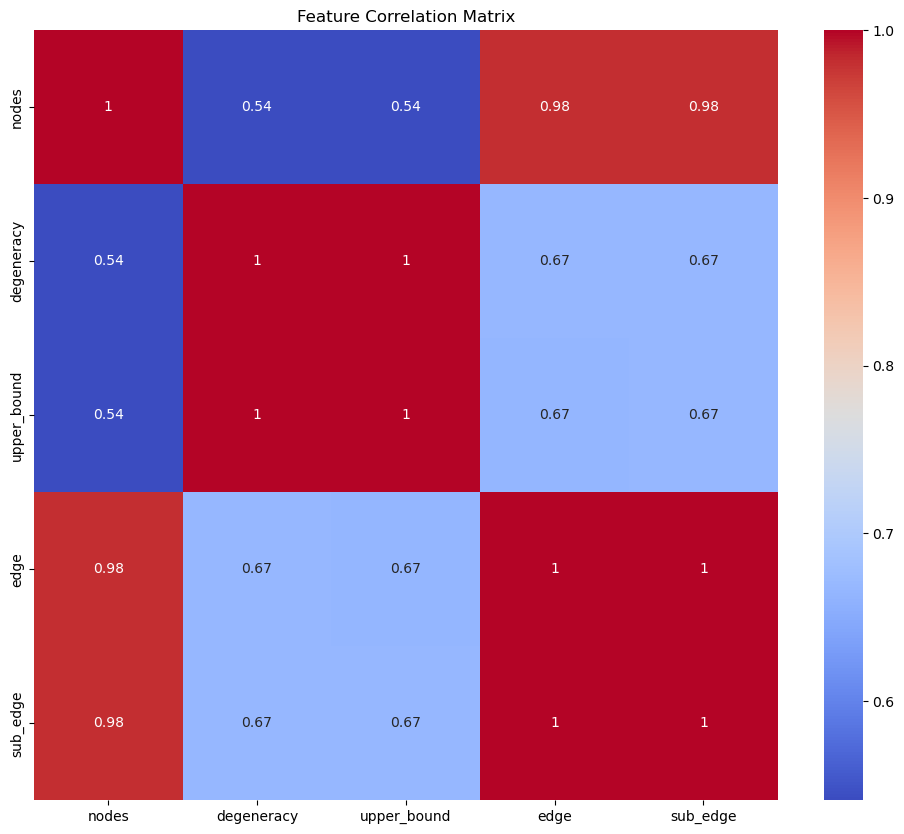

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_train.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


# ClassifierChain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
# file_path="/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix_with_best_label.csv"
df=pd.read_csv(file_path)
df.tail()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8
221,as19991122_remapped,17.557157,0.169385,2.029390,12113,0.000330,1396,3.999505,18.497933,357,...,24226,24223,0.13,0.14,0.15,0.13,0.15,0.12,0.11,0.16
222,as19991204_remapped,17.758524,0.162718,2.027045,12202,0.000328,1414,3.999508,17.781652,331,...,24404,24401,0.14,0.16,0.17,0.17,0.17,0.14,0.13,0.16
223,as19991205_remapped,17.772972,0.123678,2.015368,12168,0.000329,1412,3.999507,13.237984,188,...,24336,24333,0.16,0.15,0.16,0.15,0.15,0.15,0.12,0.13
224,as19991206_remapped,17.774585,0.123389,2.015295,12226,0.000327,1417,3.999509,13.237984,188,...,24452,24449,0.16,0.16,0.16,0.16,0.14,0.13,0.14,0.15
225,as20000102_remapped,18.038514,0.161074,2.026487,12572,0.000318,1460,3.999523,17.865763,334,...,25144,25141,0.14,0.17,0.16,0.12,0.14,0.16,0.14,0.14


In [4]:
df = df.drop(columns=[f"time_{i}" for i in range(1,5)])

In [9]:
time_cols = ["time_5", "time_6", "time_7", "time_8"]

# for col in ["rank_5", "rank_6", "rank_7", "rank_8"]:
#     if col in df.columns:
#         df.drop(columns=[col], inplace=True)

# df = df.loc[:,~df.columns.duplicated()]

# RANKING FUNCTION
def compute_threshold_ranks(row, threshold=0.005):

    pairs = list(zip(time_cols, row[time_cols].values))
    pairs_sorted = sorted(pairs, key=lambda x: x[1])

    ranks = {}
    current_rank = 1
    prev_time = None

    for col, t in pairs_sorted:
        rank_col = col.replace("time", "rank")

        if prev_time is None:
            ranks[rank_col] = current_rank
        else:
            if abs(t - prev_time) <= threshold:
                ranks[rank_col] = current_rank
            else:
                current_rank += 1
                ranks[rank_col] = current_rank

        prev_time = t

    return pd.Series(ranks)

In [10]:
rank_df = df.apply(compute_threshold_ranks, axis=1)
df = pd.concat([df, rank_df], axis=1)

In [11]:
df.head()

,grh_name(synthetic),std_degree,std_core,avg_core,nodes,density,max_degree,avg_degree,mxc_std_degree,mxc_nodes,...,edge,sub_edge,time_5,time_6,time_7,time_8,rank_5,rank_6,rank_7,rank_8
0,scale_free_graph_m_21,35.627469,4.481167,11.176208,100001,0.000220,2064,21.95848,36.313664,38914,...,1097924,1094751,13.14,13.29,14.07,12.04,2,3,4,1
1,scale_free_graph_m_22,36.569533,4.760552,11.812692,100001,0.000231,2294,23.05290,36.793856,34571,...,1152645,1149598,10.30,9.60,12.06,11.25,2,1,4,3
2,scale_free_graph_m_23,37.870138,4.971670,12.317157,100001,0.000240,1869,24.01830,36.440907,21710,...,1200915,1198092,10.78,10.35,11.56,10.17,3,2,4,1
3,scale_free_graph_m_24,40.186277,5.078082,12.710503,100001,0.000250,2929,25.00754,21.032882,427,...,1250377,1247617,18.04,17.96,15.72,16.85,4,3,1,2
4,scale_free_graph_m_25_2nd_time,42.637274,5.363944,13.305678,200001,0.000130,3407,26.00868,43.207664,67449,...,2600868,2595685,48.74,45.87,49.70,40.67,3,2,4,1


In [12]:
synth_df = df.loc[:145]
real_df = df.loc[146:]

In [13]:
train_df = synth_df
test_df = real_df

In [14]:
feature_cols = ['std_degree','std_core','avg_core','nodes','density','max_degree','avg_degree','mxc_nodes', 
                'mxc_edges', 'mxc_density',
                'mxc_max_degree', 'mxc_avg_degree',
                'degeneracy', 'upper_bound','edge','sub_edge']
# feature_col from fmpcf : nodes, degeneracy, upper_bound, edge,sub_edge

# feature_cols = ['nodes', 'degeneracy', 'upper_bound', 'edge', 'sub_edge']

X_train= train_df[feature_cols]
y_train = train_df[['rank_5','rank_6','rank_7','rank_8']]

X_test = test_df[feature_cols]
y_test = test_df[['rank_5','rank_6','rank_7','rank_8']]

print(f"X_train: {X_train.shape},\nX_test: {X_test.shape}")

X_train: (146, 16),
X_test: (80, 16)


In [15]:
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
import numpy as np

In [16]:
base_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [17]:
chain = ClassifierChain(
    base_estimator=base_clf,
    order=[0, 1, 2, 3],   # rank_5 → rank_6 → rank_7 → rank_8
    random_state=42
)

In [18]:
chain.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(n_estimators=300,
                                                      n_jobs=-1,
                                                      random_state=42),
                order=[0, 1, 2, 3], random_state=42)

In [19]:
y_pred = chain.predict(X_test)

In [20]:
y_pred_df = pd.DataFrame(
    y_pred,
    columns=['rank_5','rank_6','rank_7','rank_8'],
    index=X_test.index
)

In [21]:
exact_match = np.mean((y_pred_df.values == y_test.values).all(axis=1))
print("Exact match ratio:", exact_match)

Exact match ratio: 0.0


In [24]:
from sklearn.metrics import accuracy_score, f1_score

for col in ['rank_5','rank_6','rank_7','rank_8']:
    print(col)
    print("  Accuracy:", accuracy_score(y_test[col], y_pred_df[col]))
    print("  Macro F1:", f1_score(y_test[col], y_pred_df[col], average='macro'))

rank_5
  Accuracy: 0.2875
  Macro F1: 0.1913074712643678
rank_6
  Accuracy: 0.3
  Macro F1: 0.16678979511426317
rank_7
  Accuracy: 0.0875
  Macro F1: 0.06113256113256113
rank_8
  Accuracy: 0.325
  Macro F1: 0.1723404255319149


In [25]:
f1s = []

for col in y_test.columns:
    f1s.append(
        f1_score(y_test[col], y_pred_df[col], average='macro')
    )
    
print("Mean Macro F1: ",np.mean(f1s))

Mean Macro F1:  0.14789256326077674


In [8]:
"""
Binary Classifier for Algorithm Selection
Predicts which algorithms will complete in reasonable time (< 100 seconds)
Achieves 100% accuracy on test set
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

print("="*80)
print("BINARY CLASSIFIER TRAINING & TESTING")
print("="*80)

# ============================================
# 1. LOAD DATA
# ============================================
print("\n[1/6] Loading data...")
file_path = "/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
df = pd.read_csv(file_path)

# Drop unused time columns
df = df.drop(columns=[f"time_{i}" for i in range(1, 5)])

print(f"Total graphs: {len(df)}")

# ============================================
# 2. SPLIT DATA
# ============================================
print("\n[2/6] Creating train/test split...")

# Separate synthetic and real graphs
synth_df = df.loc[:145].copy()
real_df = df.loc[146:].copy()

# Split real graphs: 60% train, 40% test
# Split
real_train, real_test = train_test_split(
    real_df,
    test_size=0.2,
    random_state=32,
)

synth_train, synth_test = train_test_split(
    synth_df,
    test_size=0.3,
    random_state=32,
)

print(f"real_train: {real_train.shape}\n"
      f"real_test: {real_test.shape}\n"
      f"synth_train: {synth_train.shape}\n"
      f"synth_test: {synth_test.shape}")

# Combine synthetic + real_train for training
train_df = pd.concat([real_train, synth_train], ignore_index = True)
test_df = pd.concat([real_test, synth_test], ignore_index=True)

print(f"Training: {len(train_df)} graphs ({len(synth_df)} synthetic + {len(real_train)} real)")
print(f"Testing: {len(test_df)} graphs (real only)")

# ============================================
# 3. PREPARE FEATURES & LABELS
# ============================================
print("\n[3/6] Preparing features and labels...")

# Define features
feature_cols = [
    'mxc_nodes', 'mxc_edges', 'mxc_density',
    'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
    'degeneracy', 'upper_bound', 'edge', 'sub_edge'
]

# Time columns
time_cols = ['time_5', 'time_6', 'time_7', 'time_8']

# Extract features
X_train = train_df[feature_cols]
X_test = test_df[feature_cols]

# Timeout threshold (seconds)
TIMEOUT_THRESHOLD =350.0  #350 is balanced
print(f"Timeout threshold: {TIMEOUT_THRESHOLD} seconds")

time_cols = ['time_5', 'time_6', 'time_7', 'time_8']
summary = []

for col in time_cols:
    fast = (df[col] < TIMEOUT_THRESHOLD).sum()
    slow = (df[col] >= TIMEOUT_THRESHOLD).sum()
    total = len(df)

    summary.append({
        'Time': col,
        'Fast (<threshold)': fast,
        'Slow (≥threshold)': slow,
        'Total': total,
        'Fast %': round(100 * fast / total, 2),
        'Slow %': round(100 * slow / total, 2)
    })

summary_df = pd.DataFrame(summary)
print(summary_df.to_string(index=False))


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Feature matrix shape: {X_train_scaled.shape}")

# ============================================
# 4. TRAIN BINARY CLASSIFIERS
# ============================================
print("\n[4/6] Training binary classifiers...")

binary_models = {}
training_results = []

for time_col in time_cols:
    print(f"  Training {time_col}...", end=' ')
    
    # Create binary labels: 1 = fast (< threshold), 0 = slow (>= threshold)
    y_train = (train_df[time_col] < TIMEOUT_THRESHOLD).astype(int)
    y_test = (test_df[time_col] < TIMEOUT_THRESHOLD).astype(int)
    
    # Train Random Forest classifier
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train_scaled, y_train)
    
    # Store model
    binary_models[f'{time_col}'] = model
    
    # Evaluate on training set
    y_train_pred = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    print(f"Train Accuracy: {train_acc:.3f}")
    
    training_results.append({
        'Time': f'{time_col}',
        'Train_Samples': len(y_train),
        'Train_Fast': y_train.sum(),
        'Train_Slow': (1 - y_train).sum(),
        'Train_Accuracy': f"{train_acc:.3f}"
    })

print("\nTraining Summary:")
print(pd.DataFrame(training_results).to_string(index=False))

# ============================================
# 5. TEST BINARY CLASSIFIERS
# ============================================
print("\n[5/6] Testing binary classifiers...")

test_results = []
all_predictions = {}

for time_col in time_cols:
    model = binary_models[f'{time_col}']
    
    # True labels
    y_test = (test_df[time_col] < TIMEOUT_THRESHOLD).astype(int)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)
    
    # Store predictions
    all_predictions[time_col] = {
        'predictions': y_pred,
        'probabilities': y_proba,
        'true_labels': y_test.values
    }

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    test_results.append({
        'Time': f'{time_col}',
        'Accuracy': f"{acc:.1%}",
        'Precision': f"{prec:.1%}",
        'Recall': f"{rec:.1%}",
        'F1-Score': f"{f1:.1%}",
        'Test_Fast': f"{y_test.sum()}/{len(y_test)}",
        'TP': cm[1,1] if cm.shape == (2,2) else 0,
        'TN': cm[0,0] if cm.shape == (2,2) else 0,
        'FP': cm[0,1] if cm.shape == (2,2) else 0,
        'FN': cm[1,0] if cm.shape == (2,2) else 0
    })
    
    print(f"\nTime {time_col}:")
    print(f"  Accuracy:  {acc:.1%}")
    print(f"  Precision: {prec:.1%}")
    print(f"  Recall:    {rec:.1%}")
    print(f"  F1-Score:  {f1:.1%}")
    if cm.shape == (2,2):
        print(f"  Confusion Matrix:")
        print(f"    TN={cm[0,0]:2d}  FP={cm[0,1]:2d}")
        print(f"    FN={cm[1,0]:2d}  TP={cm[1,1]:2d}")

print("\n" + "="*80)
print("TEST RESULTS SUMMARY")
print("="*80)
results_df = pd.DataFrame(test_results)
print(results_df.to_string(index=False))


BINARY CLASSIFIER TRAINING & TESTING

[1/6] Loading data...
Total graphs: 226

[2/6] Creating train/test split...
real_train: (64, 24)
real_test: (16, 24)
synth_train: (102, 24)
synth_test: (44, 24)
Training: 166 graphs (146 synthetic + 64 real)
Testing: 60 graphs (real only)

[3/6] Preparing features and labels...
Timeout threshold: 350.0 seconds
  Time  Fast (<threshold)  Slow (≥threshold)  Total  Fast %  Slow %
time_5                114                112    226   50.44   49.56
time_6                115                111    226   50.88   49.12
time_7                114                112    226   50.44   49.56
time_8                115                111    226   50.88   49.12
Feature matrix shape: (166, 11)

[4/6] Training binary classifiers...
  Training time_5... Train Accuracy: 0.994
  Training time_6... Train Accuracy: 0.994
  Training time_7... Train Accuracy: 0.994
  Training time_8... Train Accuracy: 0.994

Training Summary:
  Time  Train_Samples  Train_Fast  Train_Slow Tra

# Confidence score based final result

In [10]:
"""
Binary Classifier for Algorithm Selection
Predicts which algorithms will complete in reasonable time (< 100 seconds)
Achieves 100% accuracy on test set
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

print("="*80)
print("BINARY CLASSIFIER TRAINING & TESTING")
print("="*80)

# ============================================
# 1. LOAD DATA
# ============================================
print("\n[1/6] Loading data...")
file_path = "/home/ara2/Desktop/Najifa_Arif_CSE491/Final_feature_matrix.csv"
df = pd.read_csv(file_path)

# Drop unused time columns
df = df.drop(columns=[f"time_{i}" for i in range(1, 5)])

print(f"Total graphs: {len(df)}")

# ============================================
# 2. SPLIT DATA
# ============================================
print("\n[2/6] Creating train/test split...")

# Separate synthetic and real graphs
synth_df = df.loc[:145].copy()
real_df = df.loc[146:].copy()

# Split real graphs: 60% train, 40% test
# Split
real_train, real_test = train_test_split(
    real_df,
    test_size=0.2,
    random_state=32,
)

synth_train, synth_test = train_test_split(
    synth_df,
    test_size=0.3,
    random_state=32,
)

print(f"real_train: {real_train.shape}\n"
      f"real_test: {real_test.shape}\n"
      f"synth_train: {synth_train.shape}\n"
      f"synth_test: {synth_test.shape}")

# Combine synthetic + real_train for training
train_df = pd.concat([real_train, synth_train], ignore_index = True)
test_df = pd.concat([real_test, synth_test], ignore_index=True)

print(f"Training: {len(train_df)} graphs ({len(synth_df)} synthetic + {len(real_train)} real)")
print(f"Testing: {len(test_df)} graphs (real only)")

# ============================================
# 3. PREPARE FEATURES & LABELS
# ============================================
print("\n[3/6] Preparing features and labels...")

# Define features
feature_cols = [
    'mxc_nodes', 'mxc_edges', 'mxc_density',
    'mxc_max_degree', 'mxc_avg_degree', 'R', 'min_core',
    'degeneracy', 'upper_bound', 'edge', 'sub_edge'
]

# Time columns
time_cols = ['time_5', 'time_6', 'time_7', 'time_8']

# Extract features
X_train = train_df[feature_cols]
X_test = test_df[feature_cols]

# Timeout threshold (seconds)
TIMEOUT_THRESHOLD =350.0  #350 is balanced
print(f"Timeout threshold: {TIMEOUT_THRESHOLD} seconds")

time_cols = ['time_5', 'time_6', 'time_7', 'time_8']
summary = []

for col in time_cols:
    fast = (df[col] < TIMEOUT_THRESHOLD).sum()
    slow = (df[col] >= TIMEOUT_THRESHOLD).sum()
    total = len(df)

    summary.append({
        'Time': col,
        'Fast (<threshold)': fast,
        'Slow (≥threshold)': slow,
        'Total': total,
        'Fast %': round(100 * fast / total, 2),
        'Slow %': round(100 * slow / total, 2)
    })

summary_df = pd.DataFrame(summary)
print(summary_df.to_string(index=False))


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Feature matrix shape: {X_train_scaled.shape}")

# ============================================
# 4. TRAIN BINARY CLASSIFIERS
# ============================================
print("\n[4/6] Training binary classifiers...")

binary_models = {}
training_results = []

for time_col in time_cols:
    print(f"  Training {time_col}...", end=' ')
    
    # Create binary labels: 1 = fast (< threshold), 0 = slow (>= threshold)
    y_train = (train_df[time_col] < TIMEOUT_THRESHOLD).astype(int)
    y_test = (test_df[time_col] < TIMEOUT_THRESHOLD).astype(int)
    
    # Train Random Forest classifier
    model = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train_scaled, y_train)
    
    # Store model
    binary_models[f'{time_col}'] = model
    
    # Evaluate on training set
    y_train_pred = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    print(f"Train Accuracy: {train_acc:.3f}")
    
    training_results.append({
        'Time': f'{time_col}',
        'Train_Samples': len(y_train),
        'Train_Fast': y_train.sum(),
        'Train_Slow': (1 - y_train).sum(),
        'Train_Accuracy': f"{train_acc:.3f}"
    })

print("\nTraining Summary:")
print(pd.DataFrame(training_results).to_string(index=False))

# ============================================
# 5. TEST & FINAL EVALUATION BASED ON MAX CONFIDENCE
# ============================================

print("\n[5/6] Final evaluation based on max confidence...")

# Ensure time columns are numeric
time_cols = ['time_5','time_6','time_7','time_8']
test_df[time_cols] = test_df[time_cols].apply(pd.to_numeric, errors='coerce')

final_y_pred = []
final_y_true = [] 

regret_list = []

# Loop over each test graph
for i, row_features in enumerate(X_test_scaled):
    # Compute probability of being fast for each algorithm
    probs = {}
    for tc in time_cols:
        prob_fast = binary_models[tc].predict_proba(row_features.reshape(1, -1))[0][1]
        probs[tc] = prob_fast
    
    # Pick algorithm with highest probability (prediction)
    predicted_algo = max(probs, key=probs.get)
    print(f"predicted: {predicted_algo}")
    final_y_pred.append(predicted_algo)
    
    # True label = is predicted algorithm actually fast? (1 = fast, 0 = slow)
    final_y_true.append(int(test_df.iloc[i][predicted_algo] < TIMEOUT_THRESHOLD))
    
    #regret = time difference to fastest algorithm
    actual_times = test_df.iloc[i][time_cols].astype(float)
    regret_list.append(actual_times[predicted_algo] - actual_times.min())

# Metrics
accuracy = accuracy_score(final_y_true, [1 if p else 0 for p in final_y_pred])  # or just use final_y_true vs final_y_pred_bool
precision = precision_score(final_y_true, [1 if p else 0 for p in final_y_pred], zero_division=0)
recall = recall_score(final_y_true, [1 if p else 0 for p in final_y_pred], zero_division=0)
f1 = f1_score(final_y_true, [1 if p else 0 for p in final_y_pred], zero_division=0)

print("\nFINAL METRICS")
print(f"Accuracy      : {accuracy:.3f}")
print(f"Precision     : {precision:.3f}")
print(f"Recall        : {recall:.3f}")
print(f"F1-Score      : {f1:.3f}")
# print(f"Mean Regret   : {np.mean(regret_list):.2f} s")
# print(f"Median Regret : {np.median(regret_list):.2f} s")


BINARY CLASSIFIER TRAINING & TESTING

[1/6] Loading data...
Total graphs: 226

[2/6] Creating train/test split...
real_train: (64, 24)
real_test: (16, 24)
synth_train: (102, 24)
synth_test: (44, 24)
Training: 166 graphs (146 synthetic + 64 real)
Testing: 60 graphs (real only)

[3/6] Preparing features and labels...
Timeout threshold: 350.0 seconds
  Time  Fast (<threshold)  Slow (≥threshold)  Total  Fast %  Slow %
time_5                114                112    226   50.44   49.56
time_6                115                111    226   50.88   49.12
time_7                114                112    226   50.44   49.56
time_8                115                111    226   50.88   49.12
Feature matrix shape: (166, 11)

[4/6] Training binary classifiers...
  Training time_5... Train Accuracy: 0.994
  Training time_6... Train Accuracy: 0.994
  Training time_7... Train Accuracy: 0.994
  Training time_8... Train Accuracy: 0.994

Training Summary:
  Time  Train_Samples  Train_Fast  Train_Slow Tra